In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


In [4]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

# colorscale = [
#     [0, '#00FFFF'],  # light cyan
#     [0.25, '#9370DB'],  # medium purple
#     [0.5, '#BA55D3'],  # medium orchid
#     [0.75, '#483D8B'],  # dark slate blue
#     [1, '#00008B']  # dark blue
# ]

colorscale = [
    '#00FFFF','#00008B','#9370DB','#00008B','#BA55D3','#00008B','#FAFAFA'  # dark blue
]

relationship_status = pd.read_csv('./data_clean/relation_ship_clean')

relationship_status.head(8)

,unique_values,counts
0,Married,49
1,married_single_not,1
2,"Single, but not in a relationship",48
3,single_not_single_in,1
4,"Single, but in a relationship",19
5,single_in_divorce,1
6,Divorced,8


In [51]:
question_score = pd.read_csv('./ChildlessnessNJ.csv')
question_score.head()

,Gender,Age,Employment Status,Race/Ethnicity,Relationship Status,Currently have children,Q1,Q2,Q3,Q4,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30
0,Female,19,Student,African American,"Single, but not in a relationship",No,5,2,5.0,5,...,3.0,5.0,2.0,5.0,2.0,2.0,3.0,1.0,4.0,3.0
1,Female,27,Currently unemployed,African American,"Single, but not in a relationship",No,4,4,5.0,5,...,3.0,4.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0
2,Female,27,Employee,Haitian-American,"Single, but not in a relationship",No,1,1,4.0,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0
3,Female,45,Employee,Haitian-American,Married,Yes,2,2,4.0,4,...,1.0,1.0,3.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0
4,Female,31,Employee,African American,Married,Yes,3,3,5.0,3,...,2.0,1.0,3.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0


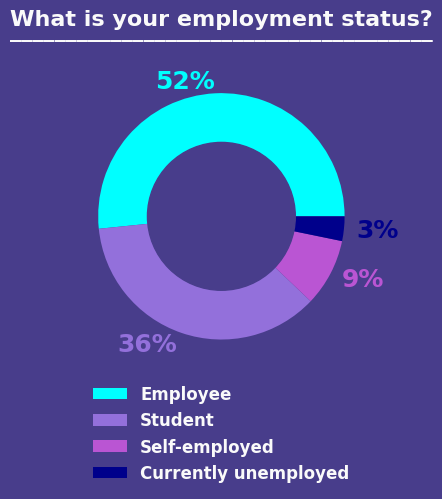

In [55]:
import matplotlib.pyplot as plt

colorscale = ['#00FFFF', '#9370DB', '#BA55D3', '#00008B'] 

# create data
size_of_groups = question_score.value_counts('Employment Status').rename_axis('unique_values').reset_index(name='counts').counts
group_names = question_score.value_counts('Employment Status').rename_axis('unique_values').reset_index(name='counts').unique_values
percentages = ['52%', '36%', '9%', '3%']

plt.figure(figsize=(6, 4))
# Create a pie plot
patches, texts = plt.pie(size_of_groups, labels=percentages, colors=colorscale, textprops={'fontsize': 18, 'weight': 'bold'})


# Set the color for each label
for text, color in zip(texts, colorscale):
    text.set_color(color)

# Add a circle at the center to transform it into a donut chart
my_circle = plt.Circle((0, 0), 0.6, color='#483D8B')
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.gcf().set_facecolor('#483D8B')

legend = plt.legend(group_names, loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=12, frameon=False)
plt.setp(legend.get_texts(), color='#FAFAFA', weight='bold')


plt.text(0, 1.6, 'What is your employment status?', ha='center', va='center', color='#FAFAFA', fontsize=16, weight='bold')
plt.text(0, 1.5, '______________________________________', ha='center', va='center', color='#FAFAFA', fontsize=16, weight='bold')

plt.show()


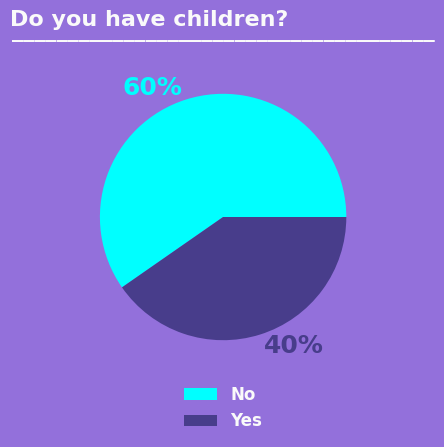

In [66]:
import matplotlib.pyplot as plt

colorscale = ['#00FFFF', '#483D8B'] 

# create data
size_of_groups = question_score.value_counts('Currently have children').rename_axis('unique_values').reset_index(name='counts').counts
group_names = question_score.value_counts('Currently have children').rename_axis('unique_values').reset_index(name='counts').unique_values
percentages = ['60%', '40%']

plt.figure(figsize=(6, 4))
# Create a pie plot
patches, texts = plt.pie(size_of_groups, labels=percentages, colors=colorscale, textprops={'fontsize': 18, 'weight': 'bold'})


# Set the color for each label
for text, color in zip(texts, colorscale):
    text.set_color(color)

plt.gcf().set_facecolor('#9370DB')

legend = plt.legend(group_names, loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=12, frameon=False)
plt.setp(legend.get_texts(), color='#FAFAFA', weight='bold')


plt.text(-0.6, 1.6, 'Do you have children?', ha='center', va='center', color='#FAFAFA', fontsize=16, weight='bold')
plt.text(0, 1.5, '______________________________________', ha='center', va='center', color='#FAFAFA', fontsize=16, weight='bold')

plt.show()


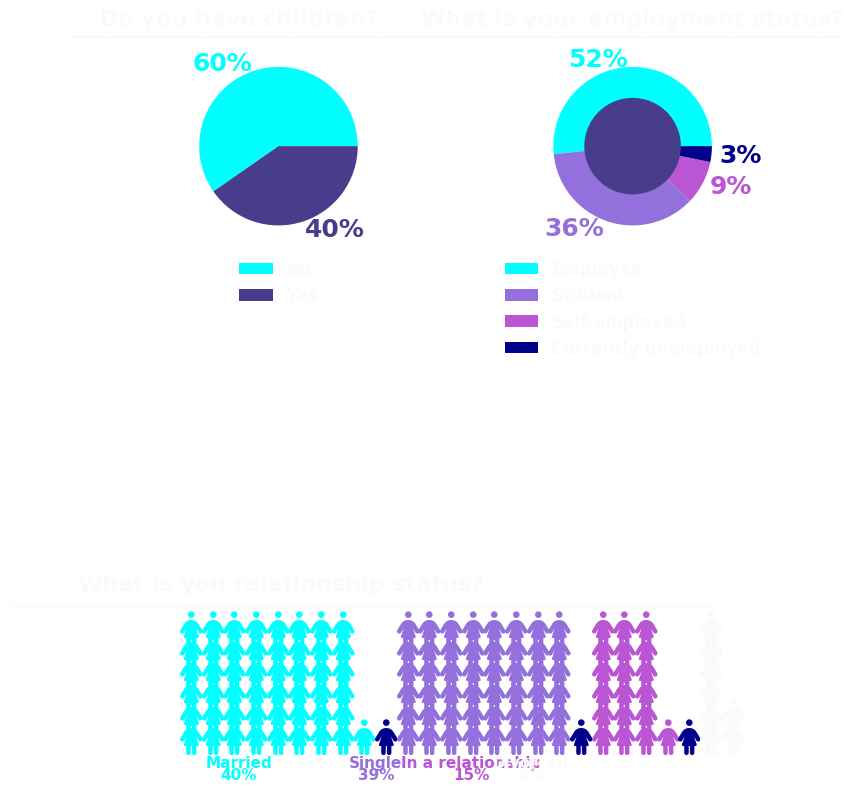

In [169]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# create a 2x2 grid, but merge bottom plots
fig = plt.figure(figsize=(8, 11))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

ax0 = plt.subplot(gs[1, :])
ax0.set_aspect(aspect="equal")

colorscale = [
    '#00FFFF','#00008B','#9370DB','#00008B','#BA55D3','#00008B','#FAFAFA'  # dark blue
]

relationship_status = pd.read_csv('./data_clean/relation_ship_clean')
Waffle.make_waffle(
    ax=ax0,  # pass axis to make_waffle
    rows=6, 
    values=list(relationship_status['counts']),
    colors=colorscale,
    icons='person-dress',
    interval_ratio_x=1,
    interval_ratio_y=1,
    block_arranging_style='new-line',
    starting_location='SW'
)
                      
# Define the labels for each category
labels = ['Married', '', 'Single', '', 'In a relationship', '', 'Divorced']

ax0.text(0.5, -0.1, 'Married', ha='center', va='center', color='#00FFFF', fontsize=11, weight='bold')
ax0.text(0.5, -0.2, '40%', ha='center', va='center', color='#00FFFF', fontsize=11, weight='bold')
ax0.text(1.65, -0.1, 'Single', ha='center', va='center', color='#9370DB', fontsize=11, weight='bold')
ax0.text(1.65, -0.2, '39%', ha='center', va='center', color='#9370DB', fontsize=11, weight='bold')
ax0.text(2.45, -0.1, 'In a relationship', ha='center', va='center', color='#BA55D3', fontsize=11, weight='bold')
ax0.text(2.45, -0.2, '15%', ha='center', va='center', color='#BA55D3', fontsize=11, weight='bold')
ax0.text(2.95, -0.1, 'Divorced', ha='center', va='center', color='#FAFAFA', fontsize=11, weight='bold')
ax0.text(2.95, -0.2, '6%', ha='center', va='center', color='#FAFAFA', fontsize=11, weight='bold')

ax0.text(0.85, 1.4, 'What is you relationship status?', ha='center', va='center', color='#FAFAFA', fontsize=16, weight='bold')
ax0.text(1.52, 1.3, '_______________________________________________________________', ha='center', va='center', color='#FAFAFA', fontsize=16, weight='bold')
ax0.set_facecolor('#00008B')

################################

ax1 = plt.subplot(gs[0, 0])
colorscale = ['#00FFFF', '#483D8B'] 

# create data
size_of_groups = question_score.value_counts('Currently have children').rename_axis('unique_values').reset_index(name='counts').counts
group_names = question_score.value_counts('Currently have children').rename_axis('unique_values').reset_index(name='counts').unique_values
percentages = ['60%', '40%']

# Create a pie plot
patches, texts = ax1.pie(size_of_groups, labels=percentages, colors=colorscale, textprops={'fontsize': 18, 'weight': 'bold'})


# Set the color for each label
for text, color in zip(texts, colorscale):
    text.set_color(color)


legend = ax1.legend(group_names, loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=12, frameon=False)
plt.setp(legend.get_texts(), color='#FAFAFA', weight='bold')


ax1.text(-0.5, 1.6, 'Do you have children?', ha='center', va='center', color='#FAFAFA', fontsize=16, weight='bold')
ax1.text(0, 1.5, '______________________________________', ha='center', va='center', color='#FAFAFA', fontsize=16, weight='bold')
ax1.set_facecolor('#9370DB')

####################################

ax2 = plt.subplot(gs[0, 1:])

colorscale = ['#00FFFF', '#9370DB', '#BA55D3', '#00008B'] 

# create data
size_of_groups = question_score.value_counts('Employment Status').rename_axis('unique_values').reset_index(name='counts').counts
group_names = question_score.value_counts('Employment Status').rename_axis('unique_values').reset_index(name='counts').unique_values
percentages = ['52%', '36%', '9%', '3%']

# Create a pie plot
patches, texts = ax2.pie(size_of_groups, labels=percentages, colors=colorscale, textprops={'fontsize': 18, 'weight': 'bold'})


# Set the color for each label
for text, color in zip(texts, colorscale):
    text.set_color(color)

center_circle = plt.Circle((0, 0), 0.6, color='#483D8B')
ax2.add_artist(center_circle)

legend = ax2.legend(group_names, loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=12, frameon=False)


ax2.text(0, 1.6, 'What is your employment status?', ha='center', va='center', color='#FAFAFA', fontsize=16, weight='bold')
ax2.text(0, 1.5, '______________________________________', ha='center', va='center', color='#FAFAFA', fontsize=16, weight='bold')
ax2.set_aspect('equal')

plt.tight_layout()  # ensures a neat layout with no overlapping
plt.setp(legend.get_texts(), color='#FAFAFA', weight='bold')

ax0.patch.set_facecolor('#00008B')
ax2.set_facecolor('#9370DB')

ax2.set_aspect('equal')





fig.get_axes()[0].set_facecolor('red')
